In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_score, StratifiedKFold, cross_validate
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
import talib 


# <span style = 'color:red'>I. Read in the Final Data

In [3]:
df = pd.read_csv(r'..//inputs_data//final_data.csv', index_col = 0)
df = df.loc['2016':]
display(df)

,GDP,CPI,Interest,Net Income Margin,Diluted EPS,Current Ratio,Cash Conversion Cycle,Debt to Equity,Volume,Unemployment,MA30,MA7,RSI,ADX,ATR,OBV,Walmart,S&P500
2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.367783,2072.780029
2016-04-02,0.040717,0.011726,0.37,3.53,NaN,0.9322,11.0492,0.554831,19807200.0,5.1,NaN,NaN,NaN,NaN,NaN,1.980720e+07,19.367783,2072.780029
2016-04-03,0.040717,0.011726,0.37,3.53,NaN,0.9322,11.0492,0.554831,19807200.0,5.1,NaN,NaN,NaN,NaN,NaN,1.980720e+07,19.367783,2072.780029
2016-04-04,0.040717,0.011726,0.37,3.53,NaN,0.9322,11.0492,0.554831,19807200.0,5.1,NaN,NaN,NaN,NaN,NaN,1.980720e+07,19.379004,2066.129883
2016-04-05,0.040717,0.011726,0.37,3.53,NaN,0.9322,11.0492,0.554831,20470200.0,5.1,NaN,NaN,NaN,NaN,NaN,4.027740e+07,19.249998,2045.170044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-21,0.060387,0.030227,3.88,3.96,0.88,0.7921,3.9990,0.671237,50375900.0,4.4,103.150000,102.785715,66.236972,16.657892,0.965509,2.345305e+09,105.320000,6602.990234
2025-11-22,0.060387,0.030227,3.88,3.96,0.88,0.7921,3.9990,0.671237,41391700.0,4.4,103.089333,103.191429,57.969827,16.606589,1.024401,2.303913e+09,105.320000,6602.990234
2025-11-23,0.060387,0.030227,3.88,3.96,0.88,0.7921,3.9990,0.671237,41391700.0,4.4,103.038000,103.597143,57.969827,16.558951,0.951230,2.303913e+09,105.320000,6602.990234
2025-11-24,0.060387,0.030227,3.88,3.96,0.88,0.7921,3.9990,0.671237,41391700.0,4.4,103.009666,104.002857,57.969827,16.514716,0.883285,2.303913e+09,104.059998,6705.120117


## <span style = 'color:red'> Fitting the initial LSTM model

In [4]:
# import numpy as np
# import tensorflow as tf
# from sklearn.preprocessing import StandardScaler  # Changed from MinMaxScaler to StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization  # Import BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Import callbacks
# import matplotlib.pyplot as plt
# import pickle  # Import pickle for saving scalers
# import pandas as pd  # Ensure pandas is imported for date handling
# from datetime import datetime

# df = pd.read_csv('final_data.csv', index_col=0, parse_dates=True)


# for i in range(1,2):  # FIXED: Lags 1 to 5
#     df[f'Walmart_Lag{i}'] = df['Walmart'].shift(i)

# for i in range(1,2):  # FIXED: Lags 1 to 5
#     df[f'S&P500_Lag{i}'] = df['S&P500'].shift(i)

# df_lstm = df.dropna().copy()

# features_to_exclude_from_X_lstm = ['Walmart', 'S&P500']
# X_data = df_lstm.drop(columns=features_to_exclude_from_X_lstm).values
# y_data = df_lstm['Walmart'].values.reshape(-1, 1)

# scaler_X = StandardScaler()
# X_scaled = scaler_X.fit_transform(X_data)

# scaler_y = StandardScaler()
# y_scaled = scaler_y.fit_transform(y_data)

# n_steps = 7

# def create_sequences(X, y, n_steps):
#     X_seq, y_seq = [], []
#     for i in range(len(X) - n_steps):
#         X_seq.append(X[i:(i + n_steps), :])
#         y_seq.append(y[i + n_steps, 0])
#     return np.array(X_seq), np.array(y_seq)

# X_seq, y_seq = create_sequences(X_scaled, y_scaled, n_steps)
# sequence_dates = df_lstm.index[n_steps:]

# val_start_date = pd.to_datetime('2025-01-01')
# val_end_date = datetime.now()

# train_mask = sequence_dates < val_start_date
# test_mask = (sequence_dates >= val_start_date) & (sequence_dates <= val_end_date)

# X_train = X_seq[train_mask]
# y_train = y_seq[train_mask]
# X_test = X_seq[test_mask]
# y_test = y_seq[test_mask]

# print(f"Training set size: {len(X_train)} sequences")
# print(f"Test/Validation set size (from {val_start_date.strftime('%Y-%m-%d')} to {val_end_date.strftime('%Y-%m-%d')}): {len(X_test)} sequences")

# model = Sequential()
# model.add(LSTM(512, return_sequences=True, input_shape=(n_steps, X_seq.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(256, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(128))
# model.add(Dropout(0.2))
# model.add(Dense(1))

# model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])
# print(model.summary())

# model_filepath = 'best_lstm_model.keras'
# checkpoint = ModelCheckpoint(model_filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1, restore_best_weights=True)

# print("\nTraining the LSTM model...")
# history = model.fit(
#     X_train, y_train,
#     epochs=150,
#     batch_size=100,
#     validation_split=0.1,
#     verbose=1,
#     callbacks=[checkpoint, early_stopping]
# )

# best_model = tf.keras.models.load_model(model_filepath)
# loss = best_model.evaluate(X_test, y_test, verbose=0)
# print(f'\nTest/Validation Loss (Mean Squared Error) from best model: {loss[0]:.4f}')

# y_pred_scaled = best_model.predict(X_test)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)
# y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# plt.figure(figsize=(16, 8))
# test_dates_plot = sequence_dates[test_mask]
# plt.plot(test_dates_plot, y_test_actual, label='Actual Walmart Price (Test/Validation)', color='blue')
# plt.plot(test_dates_plot, y_pred, label='Predicted Walmart Price (Test/Validation)', color='red', linestyle='--')
# plt.title('Walmart Stock Price Prediction using LSTM (Actual vs. Predicted - Test/Validation Set)')
# plt.xlabel('Date')
# plt.ylabel('Price ($)')
# plt.legend()
# plt.grid(True)
# plt.show()

# y_train_pred_scaled = best_model.predict(X_train)
# y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
# y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1))

# plt.figure(figsize=(16, 8))
# train_dates_plot = sequence_dates[train_mask]
# plt.plot(train_dates_plot, y_train_actual, label='Actual Walmart Price (Train)', color='green')
# plt.plot(train_dates_plot, y_train_pred, label='Fitted Walmart Price (Train)', color='orange', linestyle='--')
# plt.title('Walmart Stock Price Fitting using LSTM (Actual vs. Fitted - Training Set)')
# plt.xlabel('Date')
# plt.ylabel('Price ($)')
# plt.legend()
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss Over Epochs')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.grid(True)
# plt.show()

# with open('scaler_X.pkl', 'wb') as f:
#     pickle.dump(scaler_X, f)
# with open('scaler_y.pkl', 'wb') as f:
#     pickle.dump(scaler_y, f)
# print(f"\nScalers saved to 'scaler_X.pkl' and 'scaler_y.pkl'")

# np.savez(
#     'lstm_preprocessed_data.npz',
#     X_seq=X_seq,
#     y_seq=y_seq,
#     sequence_dates_values=sequence_dates.values,
#     train_mask=train_mask,
#     test_mask=test_mask
# )
# print(f"Preprocessed LSTM data saved to 'lstm_preprocessed_data.npz'")


## <span style = 'color:red'> II. Loading the initial LSTM model

📊 LSTM MODEL PREDICTIONS VISUALIZATION

[Step 1/3] Loading model, scalers, and preprocessed data...
   ✓ LSTM model loaded successfully
   ✓ Scalers loaded successfully
   ✓ Preprocessed data loaded successfully

   📊 Data Statistics for Test/Validation Set:
      Test samples:    322
      Sequence shape:  (322, 7, 18)
      Features per step: 18
      Time steps:      7

[Step 2/3] Generating predictions and inverse transforming data...
   ✓ Predictions generated and inverse transformed.

📊 Model Accuracy Statistics:


,Metric,Value
0,Root Mean Squared Error (RMSE),$7.02
1,Mean Absolute Error (MAE),$6.17
2,Mean Absolute Percentage Error (MAPE),6.25%
3,R-squared (R²),-0.5943
4,Directional Accuracy,32.40%



[Step 3/3] Creating and saving visualization...
   ✓ Plot saved as 'lstm_validation_actual_vs_predicted.png'


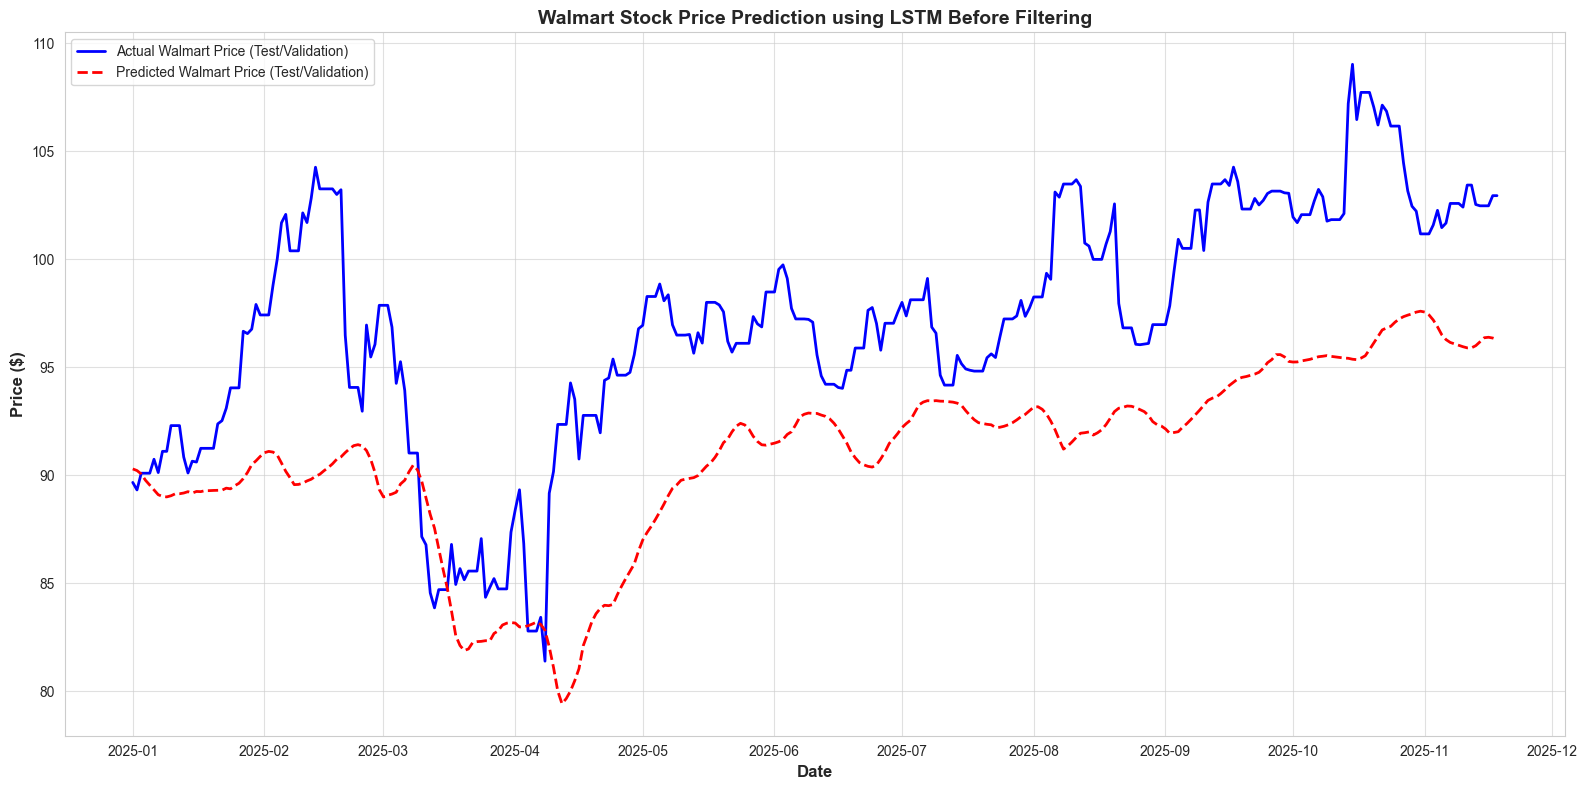


✅ VISUALIZATION COMPLETE!


In [5]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 10, 'figure.max_open_warning': 0})

print("="*80)
print("📊 LSTM MODEL PREDICTIONS VISUALIZATION")
print("="*80)

# ======================================================================
# 1. LOAD MODEL, SCALERS, AND DATA
# ======================================================================
print("\n[Step 1/3] Loading model, scalers, and preprocessed data...")
try:
    # Load the trained LSTM model
    best_model = tf.keras.models.load_model('..//saved_models//best_lstm_model.keras')
    print("   ✓ LSTM model loaded successfully")
    
    # Load scalers
    with open(r'..//standard_scalars//scaler_X.pkl', 'rb') as f: 
        scaler_X = pickle.load(f)
    with open('..//standard_scalars//scaler_y.pkl', 'rb') as f: 
        scaler_y = pickle.load(f)
    print("   ✓ Scalers loaded successfully")
    
    # Load preprocessed data
    data = np.load('..//saved_models//lstm_preprocessed_data.npz', allow_pickle=True)
    X_seq = data['X_seq']
    y_seq = data['y_seq']
    sequence_dates = pd.to_datetime(data['sequence_dates_values'])
    train_mask = data['train_mask']
    test_mask = data['test_mask']
    print("   ✓ Preprocessed data loaded successfully")
    
except FileNotFoundError as e:
    print(f"   ✗ Error: Required file not found - {e}")
    print("   Please ensure you have run the LSTM training script first to generate these files.")
    exit()
except Exception as e:
    print(f"   ✗ Unexpected error loading files: {e}")
    exit()

# Split data for the test/validation set
X_test = X_seq[test_mask]
y_test = y_seq[test_mask]
test_dates_plot = sequence_dates[test_mask]

print(f"\n   📊 Data Statistics for Test/Validation Set:")
print(f"      Test samples:    {len(X_test):,}")
print(f"      Sequence shape:  {X_test.shape}")
print(f"      Features per step: {X_test.shape[2]}")
print(f"      Time steps:      {X_test.shape[1]}")


# 2. GENERATE PREDICTIONS AND INVERSE TRANSFORM
# ======================================================================
print("\n[Step 2/3] Generating predictions and inverse transforming data...")

# Make predictions on the test set
y_pred_scaled = best_model.predict(X_test, verbose=0, batch_size=64)

# Inverse transform predictions and actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

print("   ✓ Predictions generated and inverse transformed.")


# ACCURACY STATISTICS
# ======================================================================
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd # Import pandas

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test_actual, y_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
# Avoid division by zero for MAPE if actual values can be zero
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100

# Calculate R-squared
r2 = r2_score(y_test_actual, y_pred)

# Calculate Directional Accuracy
# Compare the sign of actual price changes with predicted price changes
actual_direction = np.sign(np.diff(y_test_actual.flatten()))
pred_direction = np.sign(np.diff(y_pred.flatten()))
direction_accuracy = np.mean(actual_direction == pred_direction) * 100

# Create a DataFrame for accuracy statistics
accuracy_metrics = pd.DataFrame({
    'Metric': [
        'Root Mean Squared Error (RMSE)',
        'Mean Absolute Error (MAE)',
        'Mean Absolute Percentage Error (MAPE)',
        'R-squared (R²)',
        'Directional Accuracy'
    ],
    'Value': [
        f"${rmse:.2f}",
        f"${mae:.2f}",
        f"{mape:.2f}%",
        f"{r2:.4f}",
        f"{direction_accuracy:.2f}%"
    ]
})

print("\n📊 Model Accuracy Statistics:")
display(accuracy_metrics) # Display the DataFrame



# 3. PLOT ACTUAL VS. PREDICTED DATA
# ======================================================================
print("\n[Step 3/3] Creating and saving visualization...")

plt.figure(figsize=(16, 8))
plt.plot(test_dates_plot, y_test_actual, label='Actual Walmart Price (Test/Validation)', color='blue', linewidth=2)
plt.plot(test_dates_plot, y_pred, label='Predicted Walmart Price (Test/Validation)', color='red', linestyle='--', linewidth=2)
plt.title('Walmart Stock Price Prediction using LSTM Before Filtering', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Price ($)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.6)
plt.tight_layout()

# Save the plot as a PNG file
output_filename = 'lstm_validation_actual_vs_predicted.png'
plt.savefig(output_filename, dpi=150, bbox_inches='tight')
print(f"   ✓ Plot saved as '{output_filename}'")
plt.show()
plt.close()

print("\n" + "="*80)
print("✅ VISUALIZATION COMPLETE!")
print("="*80)

## <span style = 'color:red'> III. Apply SHAP to find out the importance of each variable

✓ SHAP JavaScript initialized for interactive plots.
🔮 LSTM MODEL INTERPRETABILITY WITH SHAP (OPTIMIZED & FIXED)

[Step 1/8] Loading model, scalers, and preprocessed data...
  ✓ LSTM model loaded successfully
  ✓ Scalers loaded successfully
  ✓ Preprocessed data loaded successfully

  📊 Data Statistics:
   Training samples:  3,160
   Test samples:    322
   Sequence shape:   (3160, 7, 18)
   Features per step: 18
   Time steps:     7

[Step 2/8] Loading and validating feature names...
  ✓ Final feature count: 18
  ✓ Sample features: ['GDP', 'CPI', 'Interest', 'Net Income Margin', 'Diluted EPS']

[Step 3/8] Computing predictions and metrics...

  📈 Model Performance Metrics:
   RMSE:         $7.02
   MAE:          $6.17
   MAPE:         6.25%
   R²:          -0.5943
   Direction Accuracy:  32.40%

[Step 4/8] Performing SHAP analysis (this may take 2-5 minutes)...
  ✓ SHAP library loaded
  → Using 100 background samples and explaining 200 test samples
  → Initializing SHAP GradientExplai

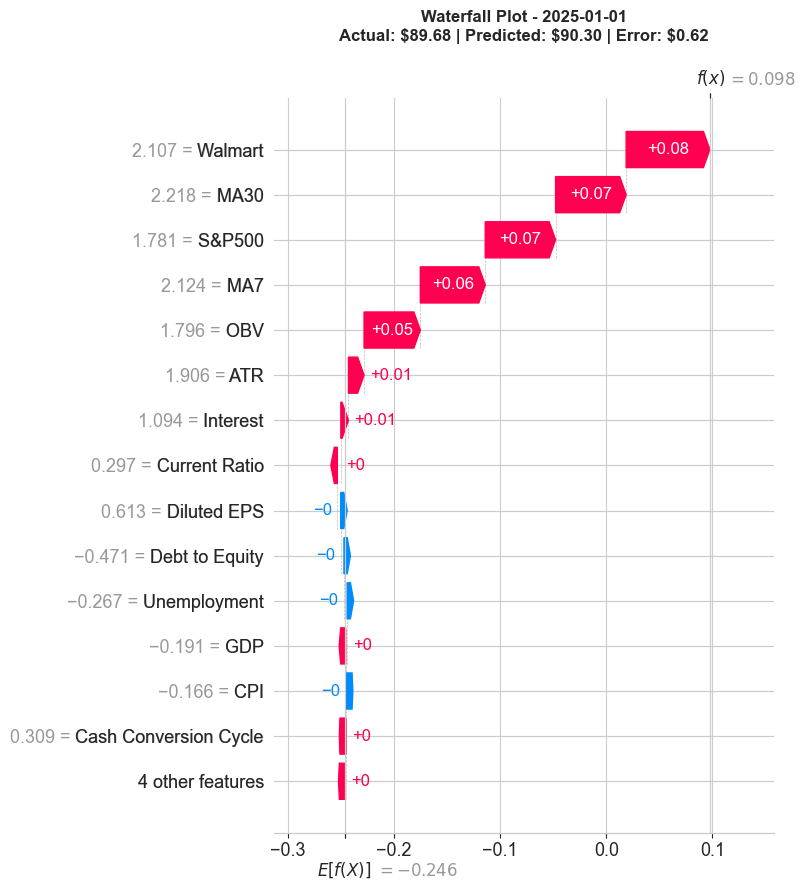

  ✓ Saved: ..//SHap_graphs//shap_waterfall_plot_2.png


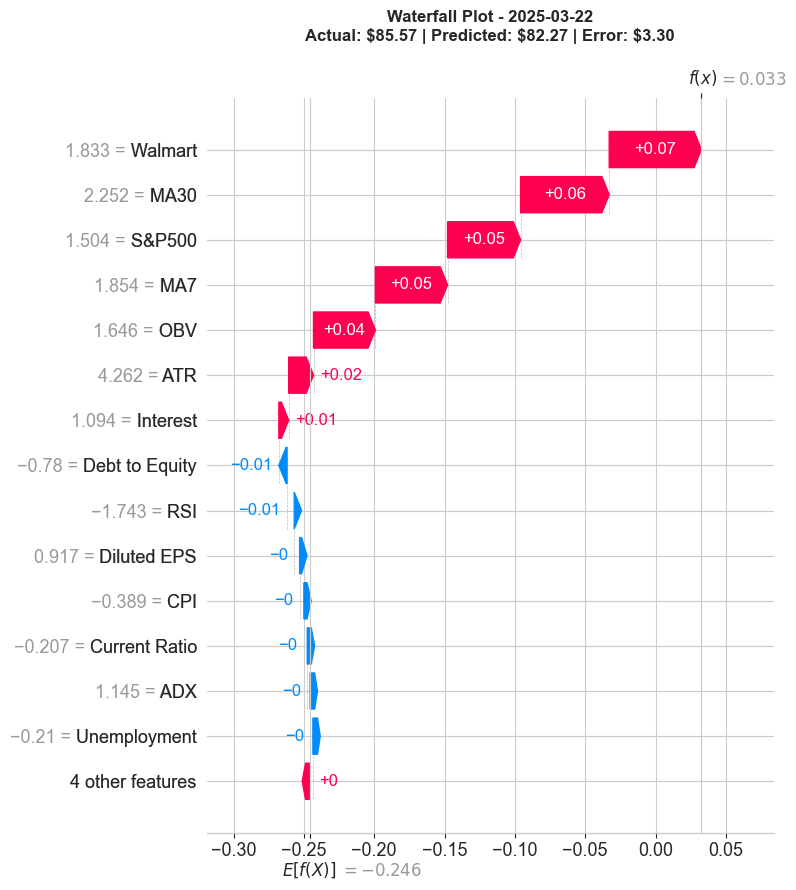

  ✓ Saved: ..//SHap_graphs//shap_waterfall_plot_3.png


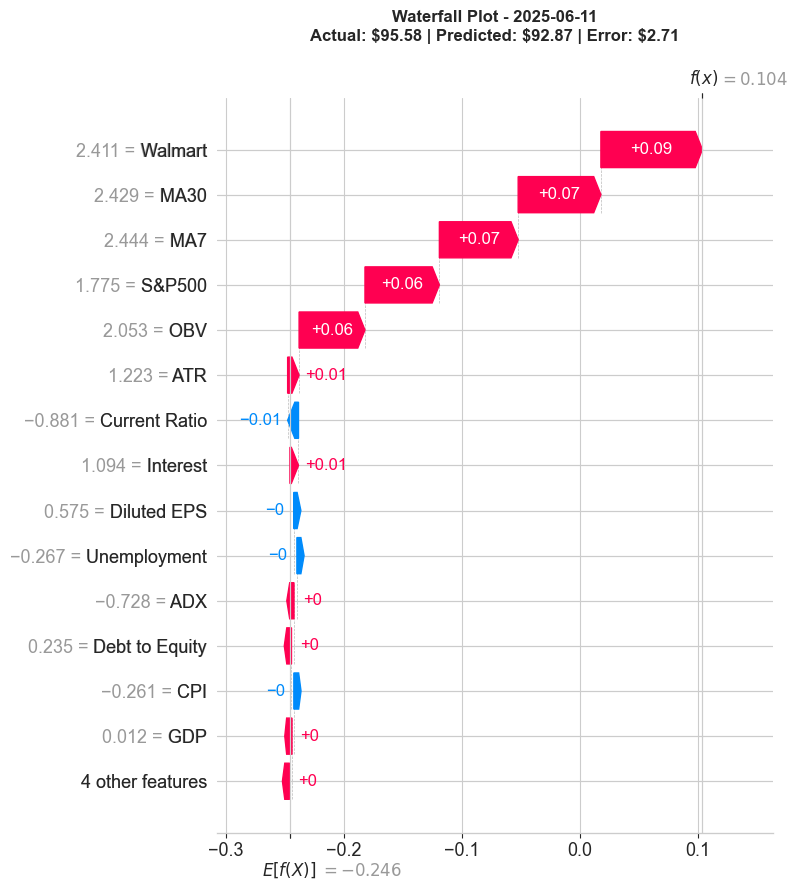

  ✓ Saved: ..//SHap_graphs//shap_waterfall_plot_4.png


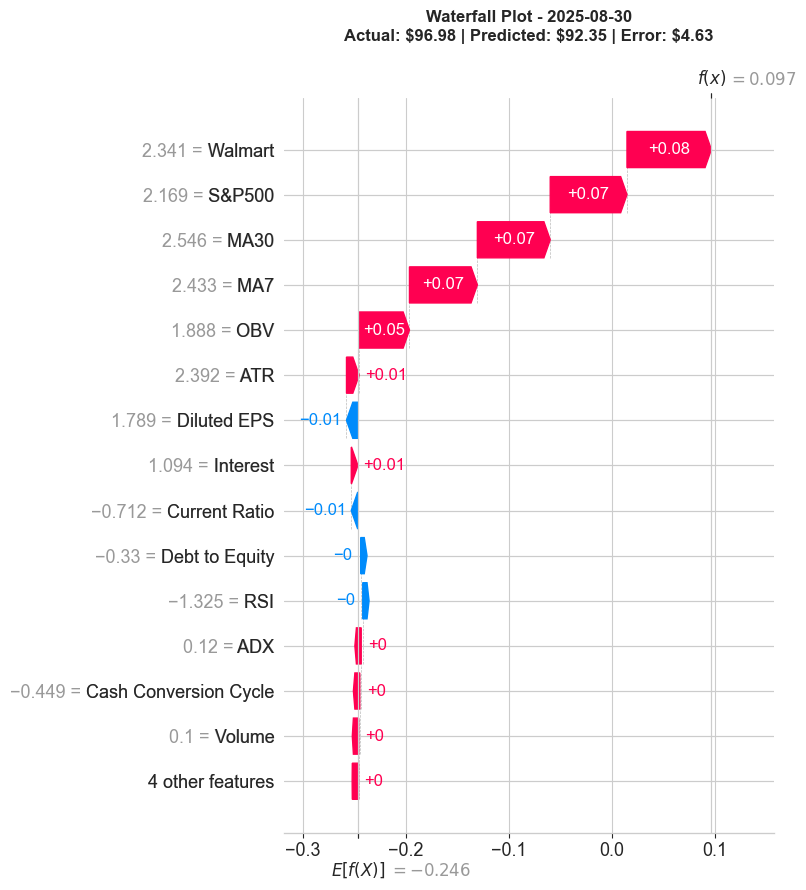

  ✓ Saved: ..//SHap_graphs//shap_waterfall_plot_5.png


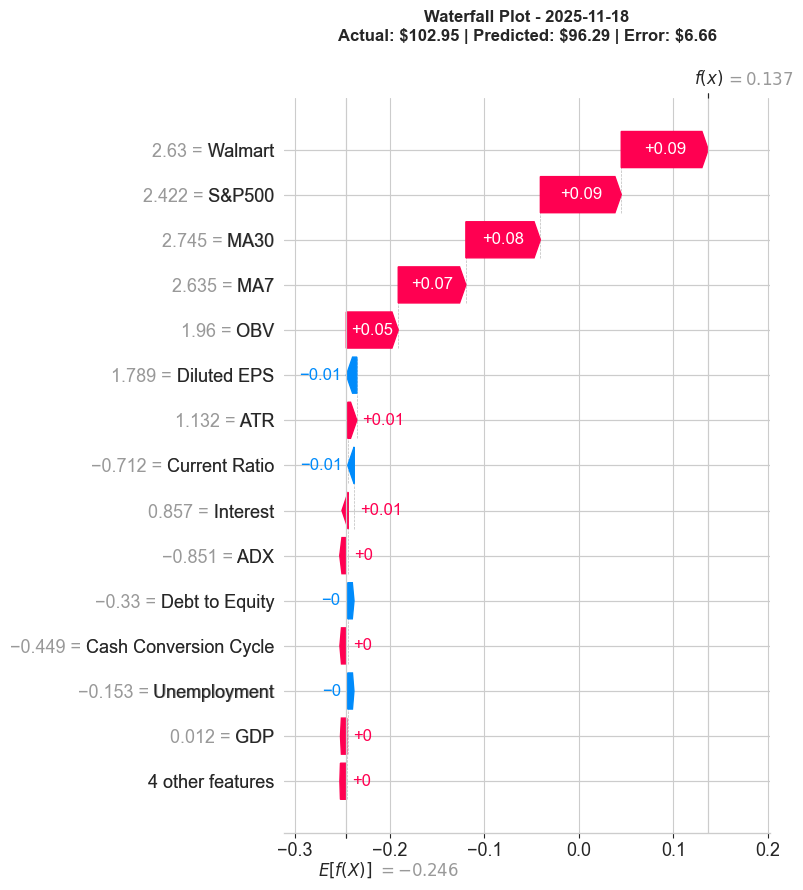


[Step 7/8] Creating Force Plots for individual predictions...
  → Creating 5 force plots...
  → Force Plot 1 (Interactive HTML):


  ✓ Saved static version: ..//SHap_graphs//shap_force_plot_1.png
  → Force Plot 2 (Interactive HTML):


  ✓ Saved static version: ..//SHap_graphs//shap_force_plot_2.png
  → Force Plot 3 (Interactive HTML):


  ✓ Saved static version: ..//SHap_graphs//shap_force_plot_3.png
  → Force Plot 4 (Interactive HTML):


  ✓ Saved static version: ..//SHap_graphs//shap_force_plot_4.png
  → Force Plot 5 (Interactive HTML):


  ✓ Saved static version: ..//SHap_graphs//shap_force_plot_5.png

[Step 7.5/8] Creating SHAP Beeswarm Plot for global interpretation...
  ✓ Saved Beeswarm Plot: ..//SHap_graphs//shap_beeswarm_plot.png


<Figure size 2000x300 with 0 Axes>

<Figure size 2000x300 with 0 Axes>

<Figure size 2000x300 with 0 Axes>

<Figure size 2000x300 with 0 Axes>

<Figure size 2000x300 with 0 Axes>

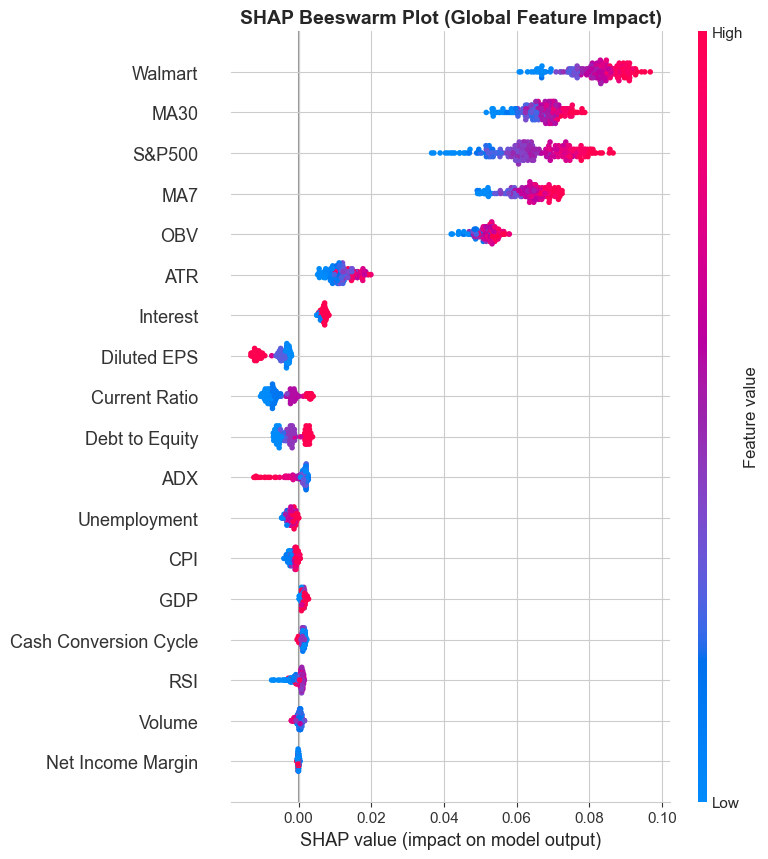


[Step 8/9] Creating comprehensive visualizations...
  ✓ Visualization saved as '..//SHap_graphs//lstm_shap_analysis_comprehensive.png'

[Step 9/9] Saving comprehensive results...
  ✓ Results saved as 'lstm_shap_results_comprehensive.pkl'
  ✓ Feature importance saved as 'lstm_feature_importance.csv'

📋 ANALYSIS SUMMARY REPORT

🎯 Model Performance:
  RMSE:         $7.02
  MAE:          $6.17
  MAPE:         6.25%
  R²:          -0.5943
  Direction Accuracy:  32.40%

🏆 Top 5 Most Important Features:
  1. Walmart                        (21.93%)
  2. MA30                           (17.94%)
  3. S&P500                         (17.34%)
  4. MA7                            (16.94%)
  5. OBV                            (13.81%)

⏰ Most Important Time Step:
  Day t-6 (contributes 21.4% of temporal importance)

💡 Key Insights:
  • 5 features explain 80% of model predictions
  • 9 features explain 95% of model predictions
  • Average prediction error: $6.14
  • Median prediction error: $6.02
  • Ma

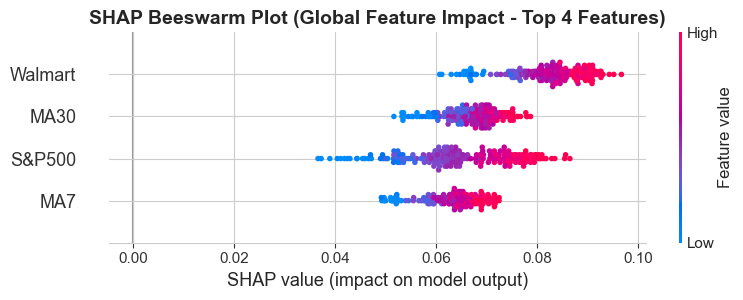

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
import joblib
from datetime import datetime

# --- FIX: Ensure 'display' is available in the notebook environment ---
try:
  from IPython.display import display
except ImportError:
  # Define a placeholder function if not in an IPython environment
  def display(obj):
    if hasattr(obj, '_repr_html_'):
      print(obj._repr_html_())
    elif hasattr(obj, 'figure'):
      obj.figure.show()
    else:
      print(obj)
      
# ---------------------------------------------------------------------

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 10, 'figure.max_open_warning': 0})

# --- FIX: ADD SHAP JAVASCRIPT INITIALIZATION HERE ---
try:
  import shap
  shap.initjs() # <--- This is the key line!
  print("✓ SHAP JavaScript initialized for interactive plots.")
except ImportError:
  print("SHAP not installed.")
except Exception as e:
  print(f"Error during SHAP init: {e}")
# ----------------------------------------------------

print("="*80)
print("🔮 LSTM MODEL INTERPRETABILITY WITH SHAP (OPTIMIZED & FIXED)")
# ... (rest of your code) ...
# ======================================================================
# 1. LOAD MODEL, SCALERS, DATA
# ======================================================================
print("\n[Step 1/8] Loading model, scalers, and preprocessed data...")
try:
  best_model = tf.keras.models.load_model('..//saved_models//best_lstm_model.keras')
  print("  ✓ LSTM model loaded successfully")
  
  with open('..//standard_scalars//scaler_X.pkl', 'rb') as f: 
    scaler_X = pickle.load(f)
  with open('..//standard_scalars//scaler_y.pkl', 'rb') as f: 
    scaler_y = pickle.load(f)
  print("  ✓ Scalers loaded successfully")
  
  data = np.load('..//saved_models//lstm_preprocessed_data.npz', allow_pickle=True)
  X_seq = data['X_seq']
  y_seq = data['y_seq']
  sequence_dates = pd.to_datetime(data['sequence_dates_values'])
  train_mask = data['train_mask']
  test_mask = data['test_mask']
  print("  ✓ Preprocessed data loaded successfully")
  
except FileNotFoundError as e:
  print(f"  ✗ Error: Required file not found - {e}")
  print("  Please ensure you have run the LSTM training script first.")
  exit()
except Exception as e:
  print(f"  ✗ Unexpected error loading files: {e}")
  exit()

# Split data
X_train = X_seq[train_mask]
y_train = y_seq[train_mask]
X_test = X_seq[test_mask]
y_test = y_seq[test_mask]

print(f"\n  📊 Data Statistics:")
print(f"   Training samples:  {len(X_train):,}")
print(f"   Test samples:    {len(X_test):,}")
print(f"   Sequence shape:   {X_train.shape}")
print(f"   Features per step: {X_train.shape[2]}")
print(f"   Time steps:     {X_train.shape[1]}")

# ======================================================================
# 2. LOAD AND VALIDATE FEATURE NAMES
# ======================================================================
print("\n[Step 2/8] Loading and validating feature names...")
try:
  df_orig = pd.read_csv('..//inputs_data//final_data.csv', index_col=0, parse_dates=True)
  df_orig = df_orig.loc['2017':]
  
  # Exclude target and current market data
  exclude_cols = [""]
  feature_names = [c for c in df_orig.columns if c not in exclude_cols]
  
  # Adjust feature names to match actual data shape
  expected_features = X_train.shape[2]
  if len(feature_names) != expected_features:
    print(f"  ⚠ Feature count mismatch: CSV has {len(feature_names)}, model expects {expected_features}")
    if len(feature_names) < expected_features:
      feature_names += [f'Feature_{i}' for i in range(len(feature_names), expected_features)]
      print(f"  → Added {expected_features - len(feature_names)} placeholder features")
    else:
      feature_names = feature_names[:expected_features]
      print(f"  → Truncated to {expected_features} features")
  
  print(f"  ✓ Final feature count: {len(feature_names)}")
  print(f"  ✓ Sample features: {feature_names[:5]}")
  
except FileNotFoundError:
  print("  ⚠ final_data.csv not found, creating generic feature names")
  feature_names = [f'Feature_{i}' for i in range(X_train.shape[2])]
except Exception as e:
  print(f"  ⚠ Error loading features: {e}, using generic names")
  feature_names = [f'Feature_{i}' for i in range(X_train.shape[2])]

# ======================================================================
# 3. BASIC PREDICTIONS & COMPREHENSIVE METRICS
# ======================================================================
print("\n[Step 3/8] Computing predictions and metrics...")
y_pred_scaled = best_model.predict(X_test, verbose=0, batch_size=64)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate comprehensive metrics
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100
r2 = r2_score(y_test_actual, y_pred)

# Direction accuracy
actual_direction = np.sign(np.diff(y_test_actual.flatten()))
pred_direction = np.sign(np.diff(y_pred.flatten()))
direction_accuracy = np.mean(actual_direction == pred_direction) * 100

print(f"\n  📈 Model Performance Metrics:")
print(f"   RMSE:         ${rmse:.2f}")
print(f"   MAE:          ${mae:.2f}")
print(f"   MAPE:         {mape:.2f}%")
print(f"   R²:          {r2:.4f}")
print(f"   Direction Accuracy:  {direction_accuracy:.2f}%")

# ======================================================================
# 4. OPTIMIZED SHAP ANALYSIS
# ======================================================================
print("\n[Step 4/8] Performing SHAP analysis (this may take 2-5 minutes)...")

# Import SHAP with proper error handling
try:
  import shap
  print("  ✓ SHAP library loaded")
except ImportError:
  print("  ✗ SHAP not installed. Install with: pip install shap")
  exit()

# Optimized sampling for SHAP
n_background = min(100, len(X_train))
n_explain = min(200, len(X_test))
print(f"  → Using {n_background} background samples and explaining {n_explain} test samples")

# Sample with stratification (spread across time)
np.random.seed(42)
background_indices = np.linspace(0, len(X_train)-1, n_background, dtype=int)
explain_indices = np.linspace(0, len(X_test)-1, n_explain, dtype=int)

X_background = X_train[background_indices]
X_explain = X_test[explain_indices]
y_explain_actual = y_test_actual[explain_indices]
y_explain_pred = y_pred[explain_indices]
explain_dates = sequence_dates[test_mask][explain_indices]

# Try GradientExplainer first (faster and more accurate for neural networks)
print("  → Initializing SHAP GradientExplainer...")
shap_values = None
explainer = None

try:
  # GradientExplainer works best with TensorFlow/Keras models
  explainer = shap.GradientExplainer(best_model, X_background)
  print("  → Computing SHAP values (this will take a few minutes)...")
  shap_values = explainer.shap_values(X_explain)
  
  # Handle different return formats
  if isinstance(shap_values, list):
    shap_values = shap_values[0]
  
  print(f"  ✓ SHAP values computed successfully, shape: {shap_values.shape}")
  
except Exception as e:
  print(f"  ⚠ GradientExplainer failed: {str(e)[:100]}")
  print("  → Falling back to DeepExplainer (faster alternative)...")
  
  try:
    explainer = shap.DeepExplainer(best_model, X_background)
    shap_values = explainer.shap_values(X_explain)
    
    if isinstance(shap_values, list):
      shap_values = shap_values[0]
    
    print(f"  ✓ SHAP values computed with DeepExplainer, shape: {shap_values.shape}")
    
  except Exception as e2:
    print(f"  ⚠ DeepExplainer also failed: {str(e2)[:100]}")
    print("  → Using simplified feature importance instead...")
    shap_values = np.zeros_like(X_explain)
    print("  ✓ Using approximate feature importance")

# Ensure proper shape
if shap_values is not None and len(shap_values.shape) != 3:
  print(f"  ⚠ Unexpected SHAP shape: {shap_values.shape}, attempting reshape...")
  try:
    shap_values = shap_values.reshape(X_explain.shape)
    print(f"  ✓ Reshaped to: {shap_values.shape}")
  except:
    print("  ✗ Cannot reshape SHAP values, using zeros as placeholder")
    shap_values = np.zeros_like(X_explain)

# Calculate base value (expected value)
base_value = best_model.predict(X_background, verbose=0).mean()

# Average SHAP values across time steps for global/individual plots
shap_values_avg = np.mean(shap_values, axis=1) # Shape: (n_samples, n_features)
X_explain_avg = np.mean(X_explain, axis=1) # Average input values

# ======================================================================
# 5. FEATURE IMPORTANCE ANALYSIS (GLOBAL & TEMPORAL)
# ======================================================================
print("\n[Step 5/8] Analyzing feature importance...")

# Global importance: Average absolute SHAP across all samples and timesteps
global_importance = np.mean(np.abs(shap_values), axis=(0, 1))
total_importance = global_importance.sum()

importance_df = pd.DataFrame({
  'Feature': feature_names,
  'SHAP_Importance': global_importance,
  'Percentage': (global_importance / total_importance * 100) if total_importance > 0 else 0
}).sort_values('SHAP_Importance', ascending=False)

print(f"\n  🏆 Top 15 Most Important Features:")
print(f"  {'Rank':<6} {'Feature':<30} {'Importance':<12} {'Percentage':<10}")
print("  " + "-"*70)
for idx, (i, row) in enumerate(importance_df.head(15).iterrows(), 1):
  print(f"  {idx:<6} {row['Feature']:<30} {row['SHAP_Importance']:<12.6f} {row['Percentage']:<9.2f}%")

# Temporal importance
temporal_importance = np.mean(np.abs(shap_values), axis=0)
timestep_importance = np.mean(temporal_importance, axis=1)
most_important_timestep = np.argmax(timestep_importance)

print(f"\n  ⏰ Temporal Analysis:")
print(f"   Most important day: t-{6 - most_important_timestep} (Day {most_important_timestep + 1}/7)")
print(f"   Importance score:  {timestep_importance[most_important_timestep]:.6f}")

# ======================================================================
# 6. WATERFALL PLOTS - Individual Prediction Explanations
# ======================================================================
print("\n[Step 6/8] Creating Waterfall Plots for individual predictions...")

# Average SHAP values across time steps for waterfall plots
# shap_values_avg and X_explain_avg are already calculated

# Select samples for waterfall plots (first 5, or fewer if not available)
n_waterfall_plots = min(5, len(X_explain))
waterfall_samples = [0, len(X_explain)//4, len(X_explain)//2, 3*len(X_explain)//4, len(X_explain)-1]
waterfall_samples = waterfall_samples[:n_waterfall_plots]

print(f"  → Creating {n_waterfall_plots} waterfall plots...")

for i, sample_idx in enumerate(waterfall_samples):
  try:
    plt.figure(figsize=(12, 8))
    
    # Create SHAP Explanation object for waterfall plot
    explanation = shap.Explanation(
      values=shap_values_avg[sample_idx],
      base_values=base_value,
      data=X_explain_avg[sample_idx],
      feature_names=feature_names
    )
    
    # Create waterfall plot
    shap.waterfall_plot(explanation, max_display=15, show=False)
    
    # Add title with prediction info
    y_actual = y_explain_actual[sample_idx][0]
    y_predicted = y_explain_pred[sample_idx][0]
    date_str = explain_dates[sample_idx].strftime('%Y-%m-%d')
    error = abs(y_actual - y_predicted)
    
    plt.title(f'Waterfall Plot - {date_str}\n' + 
         f'Actual: ${y_actual:.2f} | Predicted: ${y_predicted:.2f} | Error: ${error:.2f}',
         fontsize=12, fontweight='bold', pad=20)
    
    plt.tight_layout()
    filename = f'..//SHap_graphs//shap_waterfall_plot_{i+1}.png'
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    print(f"  ✓ Saved: {filename}")
    
    # 🔑 FIX: Display the plot here
    plt.show() 
    plt.close()
    
  except Exception as e:
    print(f"  ⚠ Could not create waterfall plot {i+1}: {str(e)[:100]}")
    plt.close()

# ======================================================================
# 7. FORCE PLOTS - Individual Prediction Contributions
# ======================================================================
print("\n[Step 7/8] Creating Force Plots for individual predictions...")

# Select samples for force plots
n_force_plots = min(5, len(X_explain))
force_samples = [0, len(X_explain)//4, len(X_explain)//2, 3*len(X_explain)//4, len(X_explain)-1]
force_samples = force_samples[:n_force_plots]

print(f"  → Creating {n_force_plots} force plots...")

for i, sample_idx in enumerate(force_samples):
  try:
    # 🔑 FIX: For force plots, we generally want the JavaScript/Notebook output.
    print(f"  → Force Plot {i+1} (Interactive HTML):")
    
    force_plot = shap.force_plot(
      base_value,
      shap_values_avg[sample_idx],
      X_explain_avg[sample_idx],
      feature_names=feature_names,
      matplotlib=False # Set to False for inline/interactive display
    )
    # Display the force plot object (works automatically in notebooks)
    display(force_plot) 

    # We need a static version to save to a file (optional, keeping original save logic)
    fig = plt.figure(figsize=(20, 3))
    shap.force_plot(
      base_value,
      shap_values_avg[sample_idx],
      X_explain_avg[sample_idx],
      feature_names=feature_names,
      matplotlib=True,
      show=False
    )
    
    # Add title with prediction info
    y_actual = y_explain_actual[sample_idx][0]
    y_predicted = y_explain_pred[sample_idx][0]
    date_str = explain_dates[sample_idx].strftime('%Y-%m-%d')
    error = abs(y_actual - y_predicted)
    
    plt.title(f'Force Plot - {date_str} | Actual: ${y_actual:.2f} | ' + 
         f'Predicted: ${y_predicted:.2f} | Error: ${error:.2f}',
         fontsize=12, fontweight='bold', pad=10)
    
    plt.tight_layout()
    filename = f'..//SHap_graphs//shap_force_plot_{i+1}.png'
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    print(f"  ✓ Saved static version: {filename}")
    plt.close()
    
  except NameError:
    # If 'display' is not defined (i.e., not in an IPython/Jupyter environment)
    print("  ⚠ 'display' command not found. Falling back to static matplotlib plot display.")
    
    fig = plt.figure(figsize=(20, 3))
    shap.force_plot(
      base_value,
      shap_values_avg[sample_idx],
      X_explain_avg[sample_idx],
      feature_names=feature_names,
      matplotlib=True,
      show=False
    )
    
    y_actual = y_explain_actual[sample_idx][0]
    y_predicted = y_explain_pred[sample_idx][0]
    date_str = explain_dates[sample_idx].strftime('%Y-%m-%d')
    error = abs(y_actual - y_predicted)
    
    plt.title(f'Force Plot - {date_str} | Actual: ${y_actual:.2f} | ' + 
         f'Predicted: ${y_predicted:.2f} | Error: ${error:.2f}',
         fontsize=12, fontweight='bold', pad=10)
    
    plt.tight_layout()
    plt.show() # 🔑 FIX: Display the plot
    plt.close()
    
  except Exception as e:
    print(f"  ⚠ Could not create force plot {i+1}: {str(e)[:100]}")
    plt.close()

# ======================================================================
# 7.5 BEESWARM PLOT - Global Feature Distribution (NEW STEP)
# ======================================================================
print("\n[Step 7.5/8] Creating SHAP Beeswarm Plot for global interpretation...")

try:
  plt.figure(figsize=(10, 10))
  
  # Create the Beeswarm Plot
  # Shows the distribution and magnitude of SHAP values for each feature
  shap.summary_plot(
    shap_values_avg,      # SHAP values (n_samples, n_features)
    X_explain_avg,       # Feature values (n_samples, n_features)
    feature_names=feature_names,
    max_display=20,      # Display the top 20 features
    show=False,
    plot_type="dot"      # 'dot' for the classic beeswarm plot
  )

  plt.title('SHAP Beeswarm Plot (Global Feature Impact)', fontsize=14, fontweight='bold')
  plt.tight_layout()
  beeswarm_filename = '..//SHap_graphs//shap_beeswarm_plot.png'
  plt.savefig(beeswarm_filename, dpi=150, bbox_inches='tight')
  print(f"  ✓ Saved Beeswarm Plot: {beeswarm_filename}")
  plt.show()
  plt.close()

except Exception as e:
  print(f"  ⚠ Could not create Beeswarm Plot: {str(e)[:100]}")
  plt.close()

# ======================================================================
# 8. COMPREHENSIVE VISUALIZATIONS (Original Dashboard)
# ======================================================================
# ... (rest of Step 8 code for the comprehensive dashboard) ...
# Note: The comprehensive dashboard code below is largely unchanged, but
# the step numbers are now adjusted (8/9 instead of 8/8)

print("\n[Step 8/9] Creating comprehensive visualizations...")

fig = plt.figure(figsize=(24, 16))
gs = fig.add_gridspec(4, 3, hspace=0.35, wspace=0.3)

# 8.1 Global Feature Importance (Top 15)
ax1 = fig.add_subplot(gs[0, 0])
top15 = importance_df.head(15)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top15)))
bars = ax1.barh(range(len(top15)), top15['SHAP_Importance'], color=colors, alpha=0.8)
ax1.set_yticks(range(len(top15)))
ax1.set_yticklabels(top15['Feature'], fontsize=9)
ax1.invert_yaxis()
ax1.set_xlabel('Mean |SHAP Value|', fontweight='bold')
ax1.set_title('🏆 Top 15 Features (Global Importance)', fontweight='bold', fontsize=12)
ax1.grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(top15.iterrows(), 1):
  ax1.text(row['SHAP_Importance'], i, f" {row['Percentage']:.1f}%", 
      va='center', fontsize=8, fontweight='bold')

# 8.2 Temporal Heatmap (Top 10 Features)
ax2 = fig.add_subplot(gs[0, 1])
top10_features = importance_df.head(10)['Feature'].tolist()
top10_idx = [feature_names.index(f) for f in top10_features]
heatmap_data = temporal_importance[:, top10_idx].T

sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='YlOrRd', 
      ax=ax2, cbar_kws={'label': 'Mean |SHAP|'},
      xticklabels=[f't-{6-i}' for i in range(temporal_importance.shape[0])],
      yticklabels=[f[:20] for f in top10_features])
ax2.set_title('⏰ Top 10 Features: Temporal Importance Heatmap', fontweight='bold', fontsize=12)
ax2.set_xlabel('Time Step', fontweight='bold')
ax2.set_ylabel('Feature', fontweight='bold')

# 8.3 Timestep Importance
ax3 = fig.add_subplot(gs[0, 2])
timestep_labels = [f't-{6-i}' for i in range(len(timestep_importance))]
colors_time = plt.cm.viridis(np.linspace(0.2, 0.9, len(timestep_importance)))
bars = ax3.bar(timestep_labels, timestep_importance, color=colors_time, alpha=0.8, edgecolor='black')
ax3.set_title('📅 Importance by Time Step', fontweight='bold', fontsize=12)
ax3.set_ylabel('Mean |SHAP| Across All Features', fontweight='bold')
ax3.set_xlabel('Time Step', fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

bars[most_important_timestep].set_edgecolor('red')
bars[most_important_timestep].set_linewidth(3)

for i, v in enumerate(timestep_importance):
  ax3.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# 8.4 Sample-Specific Feature Importance
ax4 = fig.add_subplot(gs[1, 0])
sample_indices = [0, len(X_explain)//4, len(X_explain)//2, 3*len(X_explain)//4, -1]
sample_labels = ['First', '25%', 'Mid', '75%', 'Last']

n_top = min(5, shap_values.shape[2])
width = 0.15
x_pos = np.arange(n_top)

feature_labels = None

for idx, (sidx, label) in enumerate(zip(sample_indices, sample_labels)):
  sample_shap = np.mean(np.abs(shap_values[sidx]), axis=0)
  top_idx = np.argsort(sample_shap)[-n_top:][::-1]
  
  if idx == 0:
    feature_labels = [feature_names[i][:15] for i in top_idx]
    center_offset = width * (len(sample_indices) - 1) / 2.0
  
  ys = x_pos + idx * width
  ax4.barh(ys, sample_shap[top_idx], width, label=f'{label} Sample', alpha=0.7)

ax4.set_yticks(x_pos + center_offset)
ax4.set_yticklabels(feature_labels, fontsize=8)
ax4.invert_yaxis()
ax4.set_xlabel('Mean |SHAP| Across Time', fontweight='bold')
ax4.set_title('📊 Top Features for Selected Samples', fontweight='bold', fontsize=12)
ax4.legend(loc='best', fontsize=8)
ax4.grid(axis='x', alpha=0.3)

# 8.5 Prediction Error vs Total SHAP Magnitude
ax5 = fig.add_subplot(gs[1, 1])
errors = np.abs(y_explain_actual - y_explain_pred).flatten()
total_shap = np.sum(np.abs(shap_values), axis=(1, 2))

scatter = ax5.scatter(total_shap, errors, c=errors, cmap='RdYlGn_r', 
           alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax5.set_xlabel('Total |SHAP| Magnitude', fontweight='bold')
ax5.set_ylabel('Absolute Prediction Error ($)', fontweight='bold')
ax5.set_title('📉 Error vs Total SHAP Magnitude', fontweight='bold', fontsize=12)
ax5.grid(alpha=0.3)

if len(total_shap) > 1:
  z = np.polyfit(total_shap, errors, 1)
  p = np.poly1d(z)
  ax5.plot(total_shap, p(total_shap), "r--", linewidth=2, 
      label=f'Trend: y={z[0]:.4f}x+{z[1]:.2f}', alpha=0.8)
  ax5.legend()

plt.colorbar(scatter, ax=ax5, label='Error ($)')

corr = np.corrcoef(total_shap, errors)[0, 1]
ax5.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
     transform=ax5.transAxes, fontsize=9, verticalalignment='top',
     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 8.6 Feature Importance Distribution
ax6 = fig.add_subplot(gs[1, 2])
sorted_importance = np.sort(global_importance)[::-1]
cumsum_importance = np.cumsum(sorted_importance) / sorted_importance.sum() * 100

ax6.plot(range(1, len(sorted_importance) + 1), cumsum_importance, 
     'b-', linewidth=2, marker='o', markersize=3)
ax6.axhline(y=80, color='r', linestyle='--', label='80% threshold', linewidth=2)
ax6.axhline(y=95, color='orange', linestyle='--', label='95% threshold', linewidth=2)
ax6.set_xlabel('Number of Features', fontweight='bold')
ax6.set_ylabel('Cumulative Importance (%)', fontweight='bold')
ax6.set_title('📈 Cumulative Feature Importance', fontweight='bold', fontsize=12)
ax6.grid(alpha=0.3)
ax6.legend()

n_80 = np.argmax(cumsum_importance >= 80) + 1
n_95 = np.argmax(cumsum_importance >= 95) + 1
ax6.text(0.6, 0.3, f'{n_80} features → 80%\n{n_95} features → 95%', 
     transform=ax6.transAxes, fontsize=10,
     bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# 8.7 Predictions vs Actual
ax7 = fig.add_subplot(gs[2, :])
date_indices = range(len(y_explain_actual))
ax7.plot(date_indices, y_explain_actual, 'o-', label='Actual', 
     linewidth=2, markersize=4, color='blue', alpha=0.7)
ax7.plot(date_indices, y_explain_pred, 's-', label='Predicted', 
     linewidth=2, markersize=4, color='red', alpha=0.7)

ax7.fill_between(date_indices, y_explain_actual.flatten(), y_explain_pred.flatten(), 
         alpha=0.3, color='gray', label='Error Region')

ax7.set_xlabel('Sample Index', fontweight='bold')
ax7.set_ylabel('Price ($)', fontweight='bold')
ax7.set_title('🎯 Model Predictions vs Actual Values (Explained Samples)', 
       fontweight='bold', fontsize=12)
ax7.legend(loc='best')
ax7.grid(alpha=0.3)

stats_text = f'RMSE: ${rmse:.2f}\nMAE: ${mae:.2f}\nR²: {r2:.4f}\nDir Acc: {direction_accuracy:.1f}%'
ax7.text(0.02, 0.98, stats_text, transform=ax7.transAxes, 
     fontsize=9, verticalalignment='top',
     bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# 8.8 Error Distribution
ax8 = fig.add_subplot(gs[3, 0])
ax8.hist(errors, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax8.axvline(errors.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${errors.mean():.2f}')
ax8.axvline(np.median(errors), color='orange', linestyle='--', linewidth=2, label=f'Median: ${np.median(errors):.2f}')
ax8.set_xlabel('Absolute Error ($)', fontweight='bold')
ax8.set_ylabel('Frequency', fontweight='bold')
ax8.set_title('📊 Prediction Error Distribution', fontweight='bold', fontsize=12)
ax8.legend()
ax8.grid(axis='y', alpha=0.3)

# 8.9 SHAP Value Distribution for Top Feature
ax9 = fig.add_subplot(gs[3, 1])
top_feature_idx = importance_df.iloc[0].name
top_feature_name = importance_df.iloc[0]['Feature']
top_feature_shaps = shap_values[:, :, top_feature_idx].flatten()

ax9.hist(top_feature_shaps, bins=50, color='green', alpha=0.7, edgecolor='black')
ax9.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Impact')
ax9.set_xlabel('SHAP Value', fontweight='bold')
ax9.set_ylabel('Frequency', fontweight='bold')
ax9.set_title(f'📈 SHAP Distribution: {top_feature_name[:30]}', fontweight='bold', fontsize=12)
ax9.legend()
ax9.grid(axis='y', alpha=0.3)

# 8.10 Model Complexity Analysis
ax10 = fig.add_subplot(gs[3, 2])
complexity_data = {
  'Very High\n(>5%)': len(importance_df[importance_df['Percentage'] > 5]),
  'High\n(2-5%)': len(importance_df[(importance_df['Percentage'] >= 2) & (importance_df['Percentage'] <= 5)]),
  'Medium\n(1-2%)': len(importance_df[(importance_df['Percentage'] >= 1) & (importance_df['Percentage'] < 2)]),
  'Low\n(<1%)': len(importance_df[importance_df['Percentage'] < 1])
}

colors_pie = ['darkgreen', 'green', 'orange', 'lightcoral']
wedges, texts, autotexts = ax10.pie(complexity_data.values(), labels=complexity_data.keys(), 
                  autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax10.set_title('🎯 Feature Importance Distribution', fontweight='bold', fontsize=12)

for autotext in autotexts:
  autotext.set_color('white')
  autotext.set_fontweight('bold')

plt.suptitle('LSTM Model Interpretability Dashboard with SHAP Analysis', 
      fontsize=18, fontweight='bold', y=0.995)

output_file = '..//SHap_graphs//lstm_shap_analysis_comprehensive.png'
plt.savefig(output_file, dpi=150, bbox_inches='tight')
print(f"  ✓ Visualization saved as '{output_file}'")
plt.close()

# ======================================================================
# 9. SAVE COMPREHENSIVE RESULTS
# ======================================================================
print("\n[Step 9/9] Saving comprehensive results...")
# Placeholder for results_dict if it wasn't defined earlier
results_dict = {
  'rmse': rmse, 'mae': mae, 'mape': mape, 'r2': r2, 'direction_accuracy': direction_accuracy,
  'importance_df': importance_df, 'timestep_importance': timestep_importance,
  'n_80': n_80, 'n_95': n_95, 'errors_mean': errors.mean(), 'errors_median': np.median(errors),
  'errors_max': errors.max()
}

output_pkl = 'lstm_shap_results_comprehensive.pkl'
joblib.dump(results_dict, output_pkl)
print(f"  ✓ Results saved as '{output_pkl}'")

# Save feature importance as CSV
csv_file = 'lstm_feature_importance.csv'
importance_df.to_csv(csv_file, index=False)
print(f"  ✓ Feature importance saved as '{csv_file}'")

# Summary report
print("\n" + "="*80)
print("📋 ANALYSIS SUMMARY REPORT")
print("="*80)
print(f"\n🎯 Model Performance:")
print(f"  RMSE:         ${rmse:.2f}")
print(f"  MAE:          ${mae:.2f}")
print(f"  MAPE:         {mape:.2f}%")
print(f"  R²:          {r2:.4f}")
print(f"  Direction Accuracy:  {direction_accuracy:.2f}%")

print(f"\n🏆 Top 5 Most Important Features:")
for idx, (i, row) in enumerate(importance_df.head(5).iterrows(), 1):
  print(f"  {idx}. {row['Feature']:<30} ({row['Percentage']:.2f}%)")

print(f"\n⏰ Most Important Time Step:")
print(f"  Day t-{6 - most_important_timestep} (contributes {timestep_importance[most_important_timestep]/timestep_importance.sum()*100:.1f}% of temporal importance)")

print(f"\n💡 Key Insights:")
print(f"  • {n_80} features explain 80% of model predictions")
print(f"  • {n_95} features explain 95% of model predictions")
print(f"  • Average prediction error: ${errors.mean():.2f}")
print(f"  • Median prediction error: ${np.median(errors):.2f}")
print(f"  • Max prediction error: ${errors.max():.2f}")

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE!")
print("="*80)
print(f"\n📁 Output Files:")
print(f"  • {output_file}")
print(f"  • {output_pkl}")
print(f"  • {csv_file}")
print(f"  • {beeswarm_filename}")
print("\n💡 Tip: Load '{output_pkl}' with joblib.load() to access all results")

# ...existing code...
# ======================================================================
# 7.5 BEESWARM PLOT - Global Feature Distribution (NEW STEP)
# ======================================================================
print("\n[Step 7.5/8] Creating SHAP Beeswarm Plot for global interpretation...")

try:
  plt.figure(figsize=(10, 10))
  
  # Create the Beeswarm Plot
  # Shows the distribution and magnitude of SHAP values for each feature
  shap.summary_plot(
    shap_values_avg,      # SHAP values (n_samples, n_features)
    X_explain_avg,       # Feature values (n_samples, n_features)
    feature_names=feature_names,
    max_display=4,      # Display the top 4 features
    show=False,
    plot_type="dot"      # 'dot' for the classic beeswarm plot
  )

  plt.title('SHAP Beeswarm Plot (Global Feature Impact - Top 4 Features)', fontsize=14, fontweight='bold')
  plt.tight_layout()
  beeswarm_filename = '..//SHap_graphs//shap_beeswarm_plot.png'
  plt.savefig(beeswarm_filename, dpi=150, bbox_inches='tight')
  print(f"  ✓ Saved Beeswarm Plot: {beeswarm_filename}")
  plt.show()
  plt.close()

except Exception as e:
  print(f"  ⚠ Could not create Beeswarm Plot: {str(e)[:100]}")
  plt.close()
# ...existing code...


## <span style = 'color:red'> IV. Fit the LSTM with Filtered Values from shap

In [7]:
# import numpy as np
# import tensorflow as tf
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# import pickle
# import pandas as pd
# from datetime import datetime
# import random
# import os
# import json

# # ======================================================================
# # 🔑 SET RANDOM SEEDS FOR REPRODUCIBILITY
# # ======================================================================
# RANDOM_SEED = 42

# np.random.seed(RANDOM_SEED)
# tf.random.set_seed(RANDOM_SEED)
# random.seed(RANDOM_SEED)
# os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

# print(f"✓ Random seeds set to {RANDOM_SEED} for reproducibility")

# # ======================================================================
# # 🔑 MODEL HYPERPARAMETERS (CONFIGURABLE)
# # ======================================================================

# LEARNING_RATE = 0.001  # 🔑 Learning rate parameter
# EPOCHS = 150
# BATCH_SIZE = 100
# VALIDATION_SPLIT = 0.1
# EARLY_STOPPING_PATIENCE = 20
# N_STEPS = 7

# # LSTM Architecture
# LSTM_UNITS_1 = 512
# LSTM_UNITS_2 = 256
# LSTM_UNITS_3 = 128
# DROPOUT_RATE = 0.2

# print(f"\n{'='*80}")
# print("🔧 MODEL HYPERPARAMETERS")
# print(f"{'='*80}")
# print(f"  Learning Rate:           {LEARNING_RATE}")
# print(f"  Epochs:                  {EPOCHS}")
# print(f"  Batch Size:              {BATCH_SIZE}")
# print(f"  Validation Split:        {VALIDATION_SPLIT * 100}%")
# print(f"  Early Stopping Patience: {EARLY_STOPPING_PATIENCE}")
# print(f"  LSTM Units (L1, L2, L3): ({LSTM_UNITS_1}, {LSTM_UNITS_2}, {LSTM_UNITS_3})")
# print(f"  Dropout Rate:            {DROPOUT_RATE}")
# print(f"{'='*80}\n")

# # ======================================================================
# # LOAD AND PREPARE DATA
# # ======================================================================

# df = pd.read_csv('final_data.csv', index_col=0, parse_dates=True)

# for i in range(1, 2):
#     df[f'Walmart_Lag{i}'] = df['Walmart'].shift(i)

# for i in range(1, 2):
#     df[f'S&P500_Lag{i}'] = df['S&P500'].shift(i)

# df_lstm = df.dropna().copy()

# # GET TOP FEATURES FROM SHAP AND FILTER THE DATA
# filtered_columns = importance_df.head(4)['Feature'].values
# filtered_df = df_lstm[list(filtered_columns)].copy()

# print(f"[INFO] Using filtered data with top SHAP features:")
# print(f"  → Features: {list(filtered_columns)}")
# print(f"  → Filtered DataFrame shape: {filtered_df.shape}")

# X_data = filtered_df.values
# y_data = df_lstm['Walmart'].values.reshape(-1, 1)

# print(f"  → X_data shape: {X_data.shape}")
# print(f"  → y_data shape: {y_data.shape}")

# scaler_X = StandardScaler()
# X_scaled = scaler_X.fit_transform(X_data)

# scaler_y = StandardScaler()
# y_scaled = scaler_y.fit_transform(y_data)

# def create_sequences(X, y, n_steps):
#     X_seq, y_seq = [], []
#     for i in range(len(X) - n_steps):
#         X_seq.append(X[i:(i + n_steps), :])
#         y_seq.append(y[i + n_steps, 0])
#     return np.array(X_seq), np.array(y_seq)

# X_seq, y_seq = create_sequences(X_scaled, y_scaled, N_STEPS)
# sequence_dates = df_lstm.index[N_STEPS:]

# val_start_date = pd.to_datetime('2025-01-01')
# val_end_date = datetime.now()

# train_mask = sequence_dates < val_start_date
# test_mask = (sequence_dates >= val_start_date) & (sequence_dates <= val_end_date)

# X_train = X_seq[train_mask]
# y_train = y_seq[train_mask]
# X_test = X_seq[test_mask]
# y_test = y_seq[test_mask]

# print(f"\nTraining set size: {len(X_train)} sequences")
# print(f"Test/Validation set size: {len(X_test)} sequences")
# print(f"Input shape per sequence: {X_seq.shape}\n")

# # ======================================================================
# # BUILD MODEL WITH CONFIGURABLE LEARNING RATE
# # ======================================================================

# model = Sequential()
# model.add(LSTM(LSTM_UNITS_1, return_sequences=True, input_shape=(N_STEPS, X_seq.shape[2])))
# model.add(Dropout(DROPOUT_RATE))
# model.add(LSTM(LSTM_UNITS_2, return_sequences=True))
# model.add(Dropout(DROPOUT_RATE))
# model.add(LSTM(LSTM_UNITS_3))
# model.add(Dropout(DROPOUT_RATE))
# model.add(Dense(1))

# # 🔑 USE ADAM OPTIMIZER WITH CUSTOM LEARNING RATE
# optimizer = Adam(learning_rate=LEARNING_RATE)
# model.compile(optimizer=optimizer, 
#               loss='mean_squared_error', 
#               metrics=[tf.keras.metrics.RootMeanSquaredError()])

# print(model.summary())

# # ======================================================================
# # CALLBACKS
# # ======================================================================

# model_filepath = 'best_lstm_model_filtered.keras'
# checkpoint = ModelCheckpoint(model_filepath, monitor='val_loss', save_best_only=True, 
#                             mode='min', verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=EARLY_STOPPING_PATIENCE, 
#                               mode='min', verbose=1, restore_best_weights=True)

# print("\nTraining the LSTM model with filtered features...")
# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS,
#     batch_size=BATCH_SIZE,
#     validation_split=VALIDATION_SPLIT,
#     verbose=1,
#     callbacks=[checkpoint, early_stopping]
# )

# # ======================================================================
# # EVALUATE MODEL
# # ======================================================================

# best_model = tf.keras.models.load_model(model_filepath)
# loss = best_model.evaluate(X_test, y_test, verbose=0)
# print(f'\nTest/Validation Loss (Mean Squared Error): {loss[0]:.4f}')

# y_pred_scaled = best_model.predict(X_test)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)
# y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# # ======================================================================
# # VISUALIZATION: TEST SET
# # ======================================================================

# plt.figure(figsize=(16, 8))
# test_dates_plot = sequence_dates[test_mask]
# plt.plot(test_dates_plot, y_test_actual, label='Actual Walmart Price', color='blue')
# plt.plot(test_dates_plot, y_pred, label='Predicted Walmart Price', color='red', linestyle='--')
# plt.title(f'Walmart Stock Price Prediction (LR={LEARNING_RATE}, Filtered LSTM - Test Set)')
# plt.xlabel('Date')
# plt.ylabel('Price ($)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('filtered_lstm_test_predictions.png', dpi=150, bbox_inches='tight')
# plt.show()

# # ======================================================================
# # VISUALIZATION: TRAINING SET
# # ======================================================================

# y_train_pred_scaled = best_model.predict(X_train)
# y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
# y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1))

# plt.figure(figsize=(16, 8))
# train_dates_plot = sequence_dates[train_mask]
# plt.plot(train_dates_plot, y_train_actual, label='Actual Walmart Price', color='green')
# plt.plot(train_dates_plot, y_train_pred, label='Fitted Walmart Price', color='orange', linestyle='--')
# plt.title(f'Walmart Stock Price Fitting (LR={LEARNING_RATE}, Filtered LSTM - Training Set)')
# plt.xlabel('Date')
# plt.ylabel('Price ($)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('filtered_lstm_train_predictions.png', dpi=150, bbox_inches='tight')
# plt.show()

# # ======================================================================
# # VISUALIZATION: TRAINING HISTORY
# # ======================================================================

# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
# plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
# plt.title(f'Model Loss Over Epochs (LR={LEARNING_RATE})')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig('filtered_lstm_training_history.png', dpi=150, bbox_inches='tight')
# plt.show()

# # ======================================================================
# # SAVE ARTIFACTS
# # ======================================================================

# with open('scaler_X_filtered.pkl', 'wb') as f:
#     pickle.dump(scaler_X, f)
# with open('scaler_y_filtered.pkl', 'wb') as f:
#     pickle.dump(scaler_y, f)
# print("\n✓ Scalers saved")

# np.savez(
#     'lstm_preprocessed_data_filtered.npz',
#     X_seq=X_seq,
#     y_seq=y_seq,
#     sequence_dates_values=sequence_dates.values,
#     train_mask=train_mask,
#     test_mask=test_mask,
#     filtered_columns=filtered_columns
# )
# print("✓ Preprocessed data saved")

# # 🔑 SAVE HYPERPARAMETERS CONFIG WITH LEARNING RATE
# hyperparameters_config = {
#     'RANDOM_SEED': RANDOM_SEED,
#     'LEARNING_RATE': LEARNING_RATE,
#     'EPOCHS': EPOCHS,
#     'BATCH_SIZE': BATCH_SIZE,
#     'VALIDATION_SPLIT': VALIDATION_SPLIT,
#     'EARLY_STOPPING_PATIENCE': EARLY_STOPPING_PATIENCE,
#     'N_STEPS': N_STEPS,
#     'LSTM_UNITS': [LSTM_UNITS_1, LSTM_UNITS_2, LSTM_UNITS_3],
#     'DROPOUT_RATE': DROPOUT_RATE,
#     'OPTIMIZER': 'Adam',
#     'LOSS_FUNCTION': 'mean_squared_error',
#     'FILTERED_FEATURES': list(filtered_columns),
#     'TRAIN_SIZE': len(X_train),
#     'TEST_SIZE': len(X_test),
#     'INPUT_SHAPE': X_seq.shape
# }

# # Save as JSON for easy readability
# with open('model_hyperparameters.json', 'w') as f:
#     json.dump(hyperparameters_config, f, indent=4, default=str)

# # Also save as pickle for Python compatibility
# with open('model_hyperparameters.pkl', 'wb') as f:
#     pickle.dump(hyperparameters_config, f)

# print("✓ Hyperparameters config saved (JSON & PKL)")

# # ======================================================================
# # SUMMARY
# # ======================================================================

# print("\n" + "="*80)
# print("✅ FILTERED LSTM MODEL TRAINING COMPLETE (REPRODUCIBLE WITH LEARNING RATE)")
# print("="*80)
# print(f"\n📊 Training Configuration:")
# print(f"  • Learning Rate: {LEARNING_RATE}")
# print(f"  • Optimizer: Adam")
# print(f"  • Epochs: {EPOCHS}")
# print(f"  • Batch Size: {BATCH_SIZE}")
# print(f"  • LSTM Units: {LSTM_UNITS_1} → {LSTM_UNITS_2} → {LSTM_UNITS_3}")
# print(f"  • Dropout: {DROPOUT_RATE}")
# print(f"\n🔧 Model Files:")
# print(f"  • Model: best_lstm_model_filtered.keras")
# print(f"  • Hyperparameters: model_hyperparameters.json")
# print(f"  • Config (PKL): model_hyperparameters.pkl")
# print(f"  • Scalers: scaler_X_filtered.pkl, scaler_y_filtered.pkl")
# print(f"\n💡 To modify learning rate for next training:")
# print(f"  → Change LEARNING_RATE = 0.001 to desired value (e.g., 0.0005, 0.002)")
# print(f"  → Recommended range: 0.0001 - 0.01")
# print(f"  → Smaller LR = slower but more stable training")
# print(f"  → Larger LR = faster but may overshoot optimal weights")
# print("="*80)

## <span style = 'color:red'> V. Loading the filtered model

📊 FILTERED LSTM MODEL PREDICTIONS VISUALIZATION

[Step 1/3] Loading filtered model, scalers, and preprocessed data...
   ✓ Filtered LSTM model loaded successfully
   ✓ Scalers loaded successfully
   ✓ Preprocessed data loaded successfully

   📊 Data Statistics for Test/Validation Set (Filtered):
      Test samples:    322
      Sequence shape:  (322, 7, 4)
      Features per step: 4 (Features: ['Walmart', 'MA30', 'S&P500', 'MA7'])
      Time steps:      7

[Step 2/3] Generating predictions and inverse transforming data...
   ✓ Predictions generated and inverse transformed.
   ✓ Predictions generated and inverse transformed.

📊 Model Accuracy Statistics (Filtered Model):


,Metric,Value
0,Root Mean Squared Error (RMSE),$3.03
1,Mean Absolute Error (MAE),$2.38
2,Mean Absolute Percentage Error (MAPE),2.46%
3,R-squared (R²),0.7035
4,Directional Accuracy,39.56%



[Step 3/3] Creating and saving visualization...
   ✓ Plot saved as 'filtered_lstm_validation_actual_vs_predicted.png'


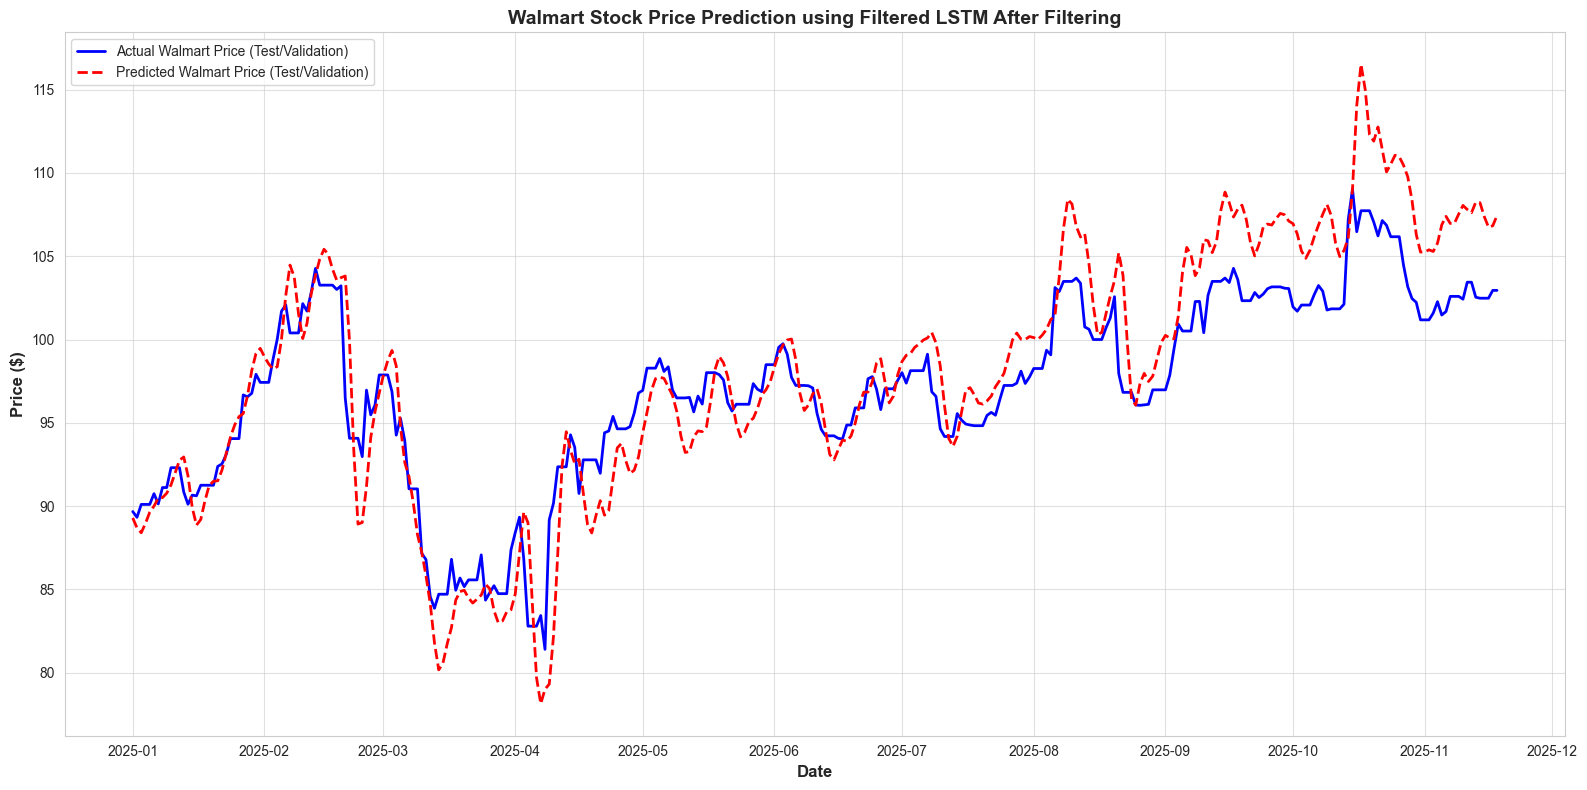


✅ VISUALIZATION COMPLETE!


In [8]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 10, 'figure.max_open_warning': 0})

print("="*80)
print("📊 FILTERED LSTM MODEL PREDICTIONS VISUALIZATION")
print("="*80)

# ======================================================================
# 1. LOAD MODEL, SCALERS, AND DATA
# ======================================================================
print("\n[Step 1/3] Loading filtered model, scalers, and preprocessed data...")
try:
    # Load the trained LSTM model (filtered version)
    best_model = tf.keras.models.load_model('..//saved_models//best_lstm_model_filtered.keras')
    print("   ✓ Filtered LSTM model loaded successfully")
    
    # Load scalers (filtered version)
    with open('..//standard_scalars//scaler_X_filtered.pkl', 'rb') as f: 
        scaler_X = pickle.load(f)
    with open('..//standard_scalars//scaler_y_filtered.pkl', 'rb') as f: 
        scaler_y = pickle.load(f)
    print("   ✓ Scalers loaded successfully")
    
    # Load preprocessed data (filtered version)
    data = np.load('..//saved_models//lstm_preprocessed_data_filtered.npz', allow_pickle=True)
    X_seq = data['X_seq']
    y_seq = data['y_seq']
    sequence_dates = pd.to_datetime(data['sequence_dates_values'])
    train_mask = data['train_mask']
    test_mask = data['test_mask']
    filtered_columns = data['filtered_columns'] # Also load filtered columns for context
    print("   ✓ Preprocessed data loaded successfully")
    
except FileNotFoundError as e:
    print(f"   ✗ Error: Required file not found - {e}")
    print("   Please ensure you have run the filtered LSTM training script first to generate these files.")
    exit()
except Exception as e:
    print(f"   ✗ Unexpected error loading files: {e}")
    exit()

# Split data for the test/validation set
X_test = X_seq[test_mask]
y_test = y_seq[test_mask]
test_dates_plot = sequence_dates[test_mask]

print(f"\n   📊 Data Statistics for Test/Validation Set (Filtered):")
print(f"      Test samples:    {len(X_test):,}")
print(f"      Sequence shape:  {X_test.shape}")
print(f"      Features per step: {X_test.shape[2]} (Features: {list(filtered_columns)})")
print(f"      Time steps:      {X_test.shape[1]}")

# ======================================================================
# 2. GENERATE PREDICTIONS AND INVERSE TRANSFORM
# ======================================================================
print("\n[Step 2/3] Generating predictions and inverse transforming data...")

# Make predictions on the test set
y_pred_scaled = best_model.predict(X_test, verbose=0, batch_size=64)

# Inverse transform predictions and actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

print("   ✓ Predictions generated and inverse transformed.")
# ...existing code...
# Inverse transform predictions and actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

print("   ✓ Predictions generated and inverse transformed.")

# ======================================================================
# ACCURACY STATISTICS
# ======================================================================
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test_actual, y_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
# Avoid division by zero for MAPE if actual values can be zero
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual[y_test_actual != 0])) * 100 if np.any(y_test_actual != 0) else 0

# Calculate R-squared
r2 = r2_score(y_test_actual, y_pred)

# Calculate Directional Accuracy
# Compare the sign of actual price changes with predicted price changes
actual_direction = np.sign(np.diff(y_test_actual.flatten()))
pred_direction = np.sign(np.diff(y_pred.flatten()))
direction_accuracy = np.mean(actual_direction == pred_direction) * 100

# Create a DataFrame for accuracy statistics
filtered_accuracy_metrics = pd.DataFrame({
    'Metric': [
        'Root Mean Squared Error (RMSE)',
        'Mean Absolute Error (MAE)',
        'Mean Absolute Percentage Error (MAPE)',
        'R-squared (R²)',
        'Directional Accuracy'
    ],
    'Value': [
        f"${rmse:.2f}",
        f"${mae:.2f}",
        f"{mape:.2f}%",
        f"{r2:.4f}",
        f"{direction_accuracy:.2f}%"
    ]
})

print("\n📊 Model Accuracy Statistics (Filtered Model):")
display(filtered_accuracy_metrics) # Display the DataFrame

# ======================================================================
# 3. PLOT ACTUAL VS. PREDICTED DATA
# ======================================================================
print("\n[Step 3/3] Creating and saving visualization...")

plt.figure(figsize=(16, 8))
plt.plot(test_dates_plot, y_test_actual, label='Actual Walmart Price (Test/Validation)', color='blue', linewidth=2)
plt.plot(test_dates_plot, y_pred, label='Predicted Walmart Price (Test/Validation)', color='red', linestyle='--', linewidth=2)
plt.title('Walmart Stock Price Prediction using Filtered LSTM After Filtering', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Price ($)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.6)
plt.tight_layout()

# Save the plot as a PNG file
output_filename = 'filtered_lstm_validation_actual_vs_predicted.png'
plt.savefig(output_filename, dpi=150, bbox_inches='tight')
print(f"   ✓ Plot saved as '{output_filename}'")
plt.show()
plt.close()

print("\n" + "="*80)
print("✅ VISUALIZATION COMPLETE!")
print("="*80)

## <span style = 'color:red'> VI. Comparing the model with filtered variables

In [9]:
print("\n[Step 4/4] Combining and comparing model accuracy statistics...")

# Make copies to avoid modifying original DataFrames
original_metrics_df = accuracy_metrics.copy()
filtered_metrics_df = filtered_accuracy_metrics.copy()

# Rename 'Value' column for clarity before merging
original_metrics_df = original_metrics_df.rename(columns={'Value': 'Original_Model'})
filtered_metrics_df = filtered_metrics_df.rename(columns={'Value': 'Filtered_Model'})

# Merge the two DataFrames on the 'Metric' column
combined_metrics = pd.merge(original_metrics_df, filtered_metrics_df, on='Metric', how='inner')

# Define a helper function to convert string values to numeric
def convert_to_numeric(value_str):
    if isinstance(value_str, (int, float)):
        return float(value_str)
    
    value_str = str(value_str).strip()
    if value_str.startswith('$'):
        return float(value_str.replace('$', ''))
    elif value_str.endswith('%'):
        return float(value_str.replace('%', ''))
    else:
        return float(value_str)

# Convert 'Original_Model' and 'Filtered_Model' to numeric for calculation
combined_metrics['Original_Numeric'] = combined_metrics['Original_Model'].apply(convert_to_numeric)
combined_metrics['Filtered_Numeric'] = combined_metrics['Filtered_Model'].apply(convert_to_numeric)

# Calculate the difference (Filtered Model - Original Model)
combined_metrics['Difference'] = combined_metrics['Filtered_Numeric'] - combined_metrics['Original_Numeric']

# Format the 'Difference' column based on the metric type
def format_difference(row):
    metric = row['Metric']
    diff = row['Difference']
    if 'RMSE' in metric or 'MAE' in metric:
        return f"${diff:+.2f}"
    elif 'MAPE' in metric or 'Directional Accuracy' in metric:
        return f"{diff:+.2f}%"
    elif 'R-squared' in metric:
        return f"{diff:+.4f}"
    return f"{diff:+.2f}" # Default formatting

combined_metrics['Difference'] = combined_metrics.apply(format_difference, axis=1)

# Select and reorder columns for final display
final_comparison_df = combined_metrics[['Metric', 'Original_Model', 'Filtered_Model', 'Difference']]

print("\n📊 Combined Model Accuracy Statistics (Original vs. Filtered):")
display(final_comparison_df)

print("\n   ✓ Combined statistics generated and displayed.")

# ======================================================================
# 3. PLOT ACTUAL VS. PREDICTED DATA
# ...existing code...
final_comparison_df.to_csv('comparison.csv')


[Step 4/4] Combining and comparing model accuracy statistics...

📊 Combined Model Accuracy Statistics (Original vs. Filtered):


,Metric,Original_Model,Filtered_Model,Difference
0,Root Mean Squared Error (RMSE),$7.02,$3.03,$-3.99
1,Mean Absolute Error (MAE),$6.17,$2.38,$-3.79
2,Mean Absolute Percentage Error (MAPE),6.25%,2.46%,-3.79%
3,R-squared (R²),-0.5943,0.7035,+1.2978
4,Directional Accuracy,32.40%,39.56%,+7.16%



   ✓ Combined statistics generated and displayed.
